In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
fashion_mnist =keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

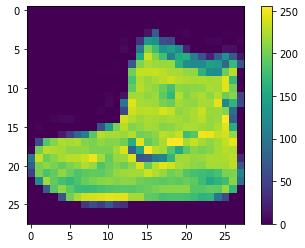

In [7]:
# 画像の確認
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
# ニューラルネットを使用するために0~1にスケール
# もともと255段階で作られているため、255で割る
# output array is read only
# train_images /= 255
# test_images /= 255

train_images = train_images / 255.0
test_images = test_images / 255.0

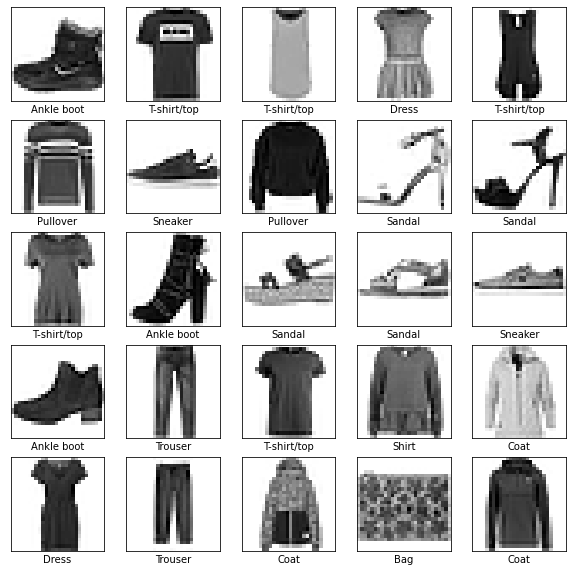

In [9]:
# 訓練データの可視化
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([]) #これ何？
    plt.yticks([]) #これ何？
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [10]:
# モデルの構築
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [11]:
# モデルのコンパイル
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=['accuracy']
)

In [12]:
# モデルの訓練
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 78us/sample - loss: 0.5015 - accuracy: 0.8233
Epoch 2/5
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3733 - accuracy: 0.8647
Epoch 3/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3372 - accuracy: 0.8772
Epoch 4/5
60000/60000 [==============================] - ETA: 0s - loss: 0.3152 - accuracy: 0.88 - 4s 66us/sample - loss: 0.3150 - accuracy: 0.8837
Epoch 5/5
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2960 - accuracy: 0.8916


In [13]:
# モデルの評価
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest Accuracy:", test_acc)

10000/10000 - 1s - loss: 0.3369 - accuracy: 0.8798

Test Accuracy: 0.8798


In [14]:
# テスト用画像の予測
predictions = model.predict(test_images)

# 最初の一つの表示(確信度)
predictions[0]

array([1.7983440e-07, 2.2367981e-10, 1.9956481e-06, 4.4317929e-08,
       4.5377186e-09, 1.0141928e-03, 1.1329339e-06, 7.7331632e-02,
       6.3214575e-06, 9.2164445e-01], dtype=float32)

In [15]:
# 一番確立が高そうなものを表示
np.argmax(predictions[0])

9

In [16]:
test_labels[0]

9

In [17]:
# グラフ化する関数
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label =np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array),
                                    class_names[true_label]),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

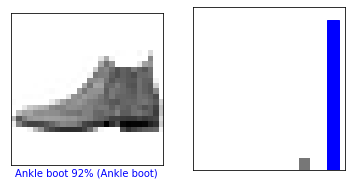

In [18]:
# 0番目の画像とグラフを表示
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images) #この関数の中に、plt.hoge()が入っている
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels) #この関数の中に、plt.hoge()が入っている
plt.show()

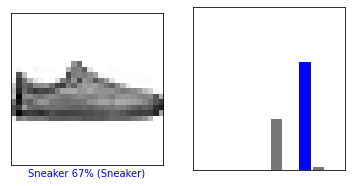

In [19]:
# 12番目の画像とグラフを表示
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

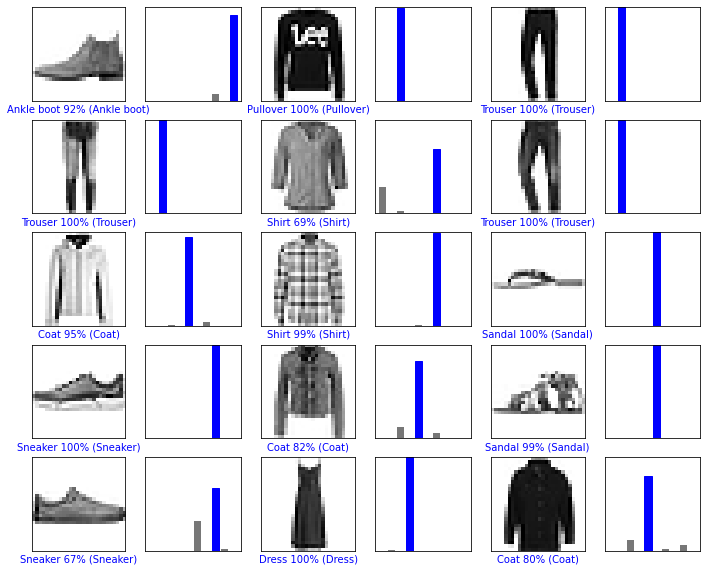

In [24]:
# 複数の画像についての表示
num_rows = 5
num_columns = 3
num_images = num_rows*num_columns
plt.figure(figsize=(2*2*num_columns, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_columns, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_columns, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [32]:
# 1枚の画像に対する予測
img = test_images[0]
img.shape

(28, 28)

In [33]:
"""
tf.keras モデルは、サンプルの中のバッチ（batch）あるいは「集まり」について予測を行うように作られています。
そのため、1枚の画像を使う場合でも、リスト化する必要があります。
"""
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [36]:
# 予測の実行
predictions_single = model.predict(img)
predictions_single

array([[1.7983457e-07, 2.2367981e-10, 1.9956481e-06, 4.4317929e-08,
        4.5377186e-09, 1.0141919e-03, 1.1329329e-06, 7.7331632e-02,
        6.3214693e-06, 9.2164445e-01]], dtype=float32)

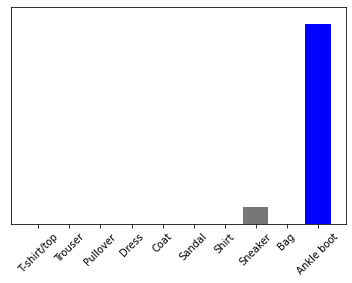

In [37]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45) #これなに？？

In [38]:
"""
model.predict メソッドの戻り値は、リストのリストです。
リストの要素のそれぞれが、バッチの中の画像に対応します。バッチの中から、（といってもバッチの中身は１つだけですが）予測を取り出します。
"""
np.argmax(predictions_single[0])

9